In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('heart.csv')

In [31]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


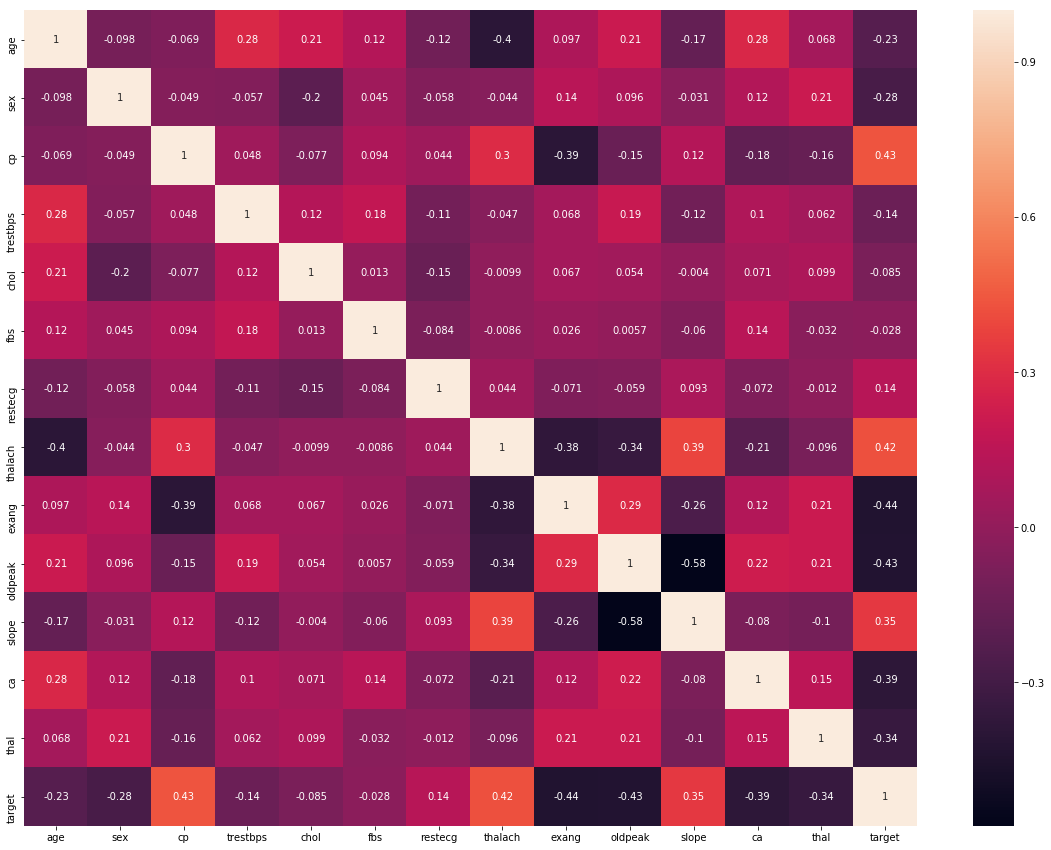

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot= True)

In [33]:
x =df.iloc[:,0:13]
y = df.iloc[:,13]

In [6]:
x.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [7]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

C:\New folder (2)\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\New folder (2)\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
from keras import Sequential
from keras.layers import Dense

In [37]:
classifier = Sequential()
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal',input_dim=13))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [38]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [39]:
history =  classifier.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.2)

Train on 193 samples, validate on 49 samples
Epoch 1/20
193/193 [==============================] - 1s 3ms/step - loss: 0.6929 - acc: 0.5648 - val_loss: 0.6943 - val_acc: 0.3673
Epoch 2/20
193/193 [==============================] - 0s 165us/step - loss: 0.6923 - acc: 0.5648 - val_loss: 0.6950 - val_acc: 0.3673
Epoch 3/20
193/193 [==============================] - 0s 150us/step - loss: 0.6913 - acc: 0.5648 - val_loss: 0.6954 - val_acc: 0.3673
Epoch 4/20
193/193 [==============================] - 0s 155us/step - loss: 0.6896 - acc: 0.5648 - val_loss: 0.6961 - val_acc: 0.3673
Epoch 5/20
193/193 [==============================] - 0s 160us/step - loss: 0.6866 - acc: 0.5648 - val_loss: 0.6962 - val_acc: 0.3673
Epoch 6/20
193/193 [==============================] - 0s 160us/step - loss: 0.6814 - acc: 0.5648 - val_loss: 0.6950 - val_acc: 0.3673
Epoch 7/20
193/193 [==============================] - 0s 165us/step - loss: 0.6737 - acc: 0.5648 - val_loss: 0.6929 - val_acc: 0.3673
Epoch 8/20
193/193 

In [40]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

242/242 [==============================] - 0s 37us/step


[0.5282340399489915, 0.8140495862842592]

In [41]:
y_pred=classifier.predict(x_test)
y_pred =(y_pred>0.5)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  9]
 [ 0 38]]


In [29]:
#out of 57 test cases , 53 were correctly predicted


In [43]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.81      1.00      0.89        38

   micro avg       0.85      0.85      0.85        61
   macro avg       0.90      0.80      0.83        61
weighted avg       0.88      0.85      0.84        61



In [44]:
eval_test = classifier.evaluate(x_test,y_test)
eval_test

61/61 [==============================] - 0s 49us/step


[0.4903921826941068, 0.8524590290960719]

In [24]:
#hyper parameter optimization

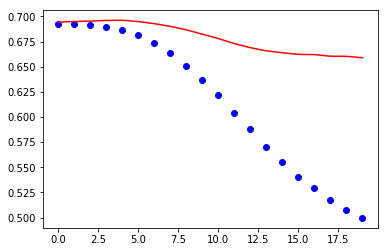

In [45]:
history_dict = history.history
    
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'bo',label = 'training-data')
plt.plot(val_loss_values,'r',label = 'val training data')
    

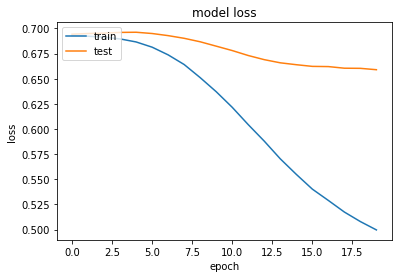

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [61]:
result = pd.DataFrame( y_pred,columns=['Result'])
result = result.replace('True',1)
result=result.replace('False',0)

In [67]:
y_test = np.array(y_test)
print(y_test[7])

1


In [71]:
result = np.array(result)
print(result[7])

[ True]


In [72]:
print(y_test[45],result[45])

1 [ True]
